In [29]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [30]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_drug_data_to_load)

clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

merged_clinical_mouse = pd.merge(clinical_df, mouse_df, how ='outer', on='Mouse ID')

# Display the data table for preview

merged_clinical_mouse.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [31]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_data = merged_clinical_mouse.groupby(["Drug", "Timepoint"]).mean()

# Preview DataFrame

mean_data.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [32]:
# Use group by fuction to group by "drug" and "timepoint" and aggregate by standard error

stnd_error = merged_clinical_mouse.groupby(["Drug", "Timepoint"]).sem()

# drop Mouse ID column since it comes in as NaN after aggragating

stnd_error = stnd_error.dropna(axis=1)
stnd_error = stnd_error.rename(columns={'Metastatic Sites':'Metastatic Sites Stnd Error','Tumor Volume (mm3)':'Volume Standard Error'})

# preview dataframe
stnd_error.head()


Metastatic Sites Stnd Error  Volume Standard Error
Drug      Timepoint                                                    
Capomulin 0                             0.000000               0.000000
          5                             0.074833               0.448593
          10                            0.125433               0.702684
          15                            0.132048               0.838617
          20                            0.161621               0.909731

In [33]:
# Define function to reforrmat a dataframe into an unstacked 2D dataframe

def df_formatter(df, new_index):
    """
    Function that takes a multi index dataframe and reformats it to a 2D dataframe, setting the new index to whatever you specify
    """
    df = df.unstack().T
    df = df.reset_index()
    df = df.drop(columns='level_0')
    df = df.set_index([new_index])
    return df

In [34]:
volume_mean = mean_data.drop(columns=['Metastatic Sites'])

volume_mean = df_formatter(volume_mean, 'Timepoint')

volume_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [35]:
volume_se = stnd_error.drop(columns=["Metastatic Sites Stnd Error"])

volume_se = df_formatter(volume_se, 'Timepoint')

volume_se

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [36]:
# Interested in these treatments: 'Capomulin', 'Infubinol', 'Ketapril', and 'Placebo'

drug_comp = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

In [37]:
# Set marker types and colors
markers = ['s','^','x','d']
colors = ['firebrick', 'darkgoldenrod', 'cadetblue', 'black']

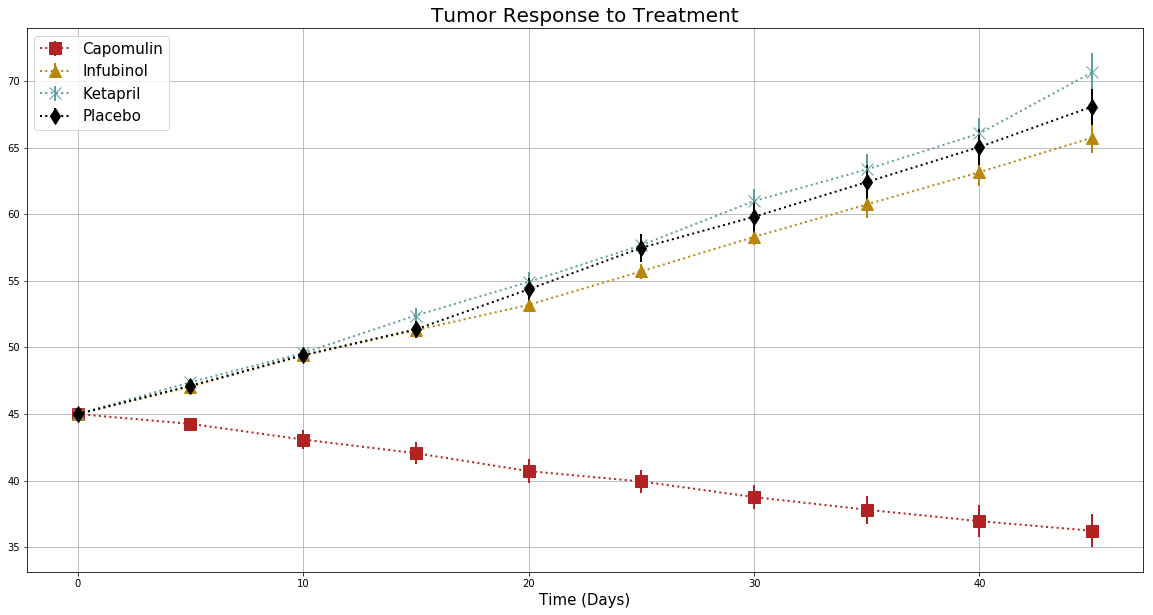

In [38]:
# Generate the Plot (with Error Bars)
vol_plot = volume_mean.plot(y=drug_comp, yerr=volume_se[drug_comp], figsize=(20,10),grid=True, 
                            linestyle=':', color=colors, ms=12, lw=2)

# set each marker to a unique marker type
for i, style in enumerate(vol_plot.get_lines()):
    style.set_marker(markers[i])

plt.legend(loc='best', prop={'size':15})
plt.title('Tumor Response to Treatment', fontsize=20)
plt.xlabel('Time (Days)', fontsize=15)
plt.savefig('Images/Tumor Response to Treatment.png')



## Metastatic Response to Treatment

In [39]:
# Do the same thing but with metastatic response

# Drop tumor volume to only keep meatastatic sites
metasite_mean = mean_data.drop(columns='Tumor Volume (mm3)')
metasite_mean = df_formatter(metasite_mean, 'Timepoint')
metasite_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [40]:
# Metastatic standard error
metasite_se = stnd_error.drop(columns='Volume Standard Error')
metasite_se = df_formatter(metasite_se, 'Timepoint')
metasite_se

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


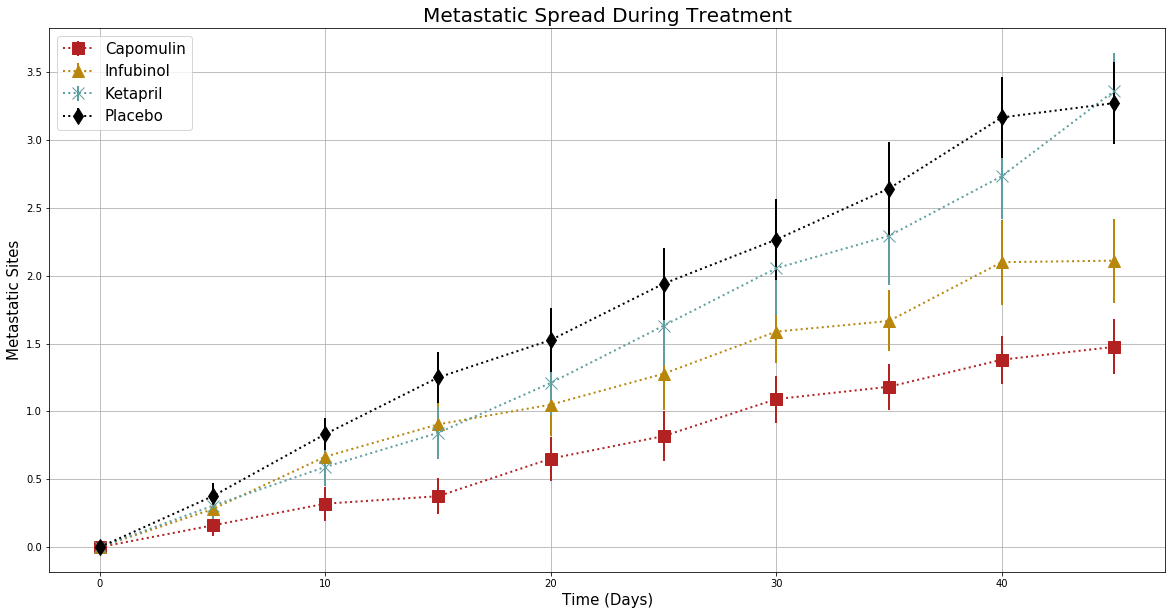

In [41]:
# Generate the Plot (with Error Bars)
metasite_plot = metasite_mean.plot(y=drug_comp, yerr=metasite_se[drug_comp], 
                                   figsize=(20,10),grid=True, linestyle=':', 
                                   color=colors, ms=12, lw=2)

# set each marker to a unique marker type
for i, style in enumerate(metasite_plot.get_lines()):
    style.set_marker(markers[i])
    
plt.legend(loc='best', prop={'size':15})
plt.title('Metastatic Spread During Treatment', fontsize=20)
plt.xlabel('Time (Days)', fontsize=15)
plt.ylabel('Metastatic Sites', fontsize=15)
plt.savefig('Images/Metastatic Spread During Treatment')

# Show the Figure


## Survival Rates

In [42]:
##### Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count = merged_clinical_mouse.groupby(['Drug', "Timepoint"]).nunique()
mouse_count = mouse_count.drop(columns=['Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug'])
mouse_count = mouse_count.rename(columns={"Mouse ID":"Mouse Count"})

# All drug trials started with 25 mice, so I can use the initial quantity of 25 to determine the survival percentage
mouse_count["Survival Rate"] = 100*mouse_count["Mouse Count"]/25
# Preview DataFrame
mouse_count.head()

Mouse Count  Survival Rate
Drug      Timepoint                            
Capomulin 0                   25          100.0
          5                   25          100.0
          10                  25          100.0
          15                  24           96.0
          20                  23           92.0

In [43]:
# Define new dataframe of just the survival rate
survival_rate = pd.DataFrame(mouse_count.pop("Survival Rate"))

survival_rate.head()

Survival Rate
Drug      Timepoint               
Capomulin 0                  100.0
          5                  100.0
          10                 100.0
          15                  96.0
          20                  92.0

In [44]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
survival_rate = df_formatter(survival_rate, 'Timepoint')
survival_rate

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


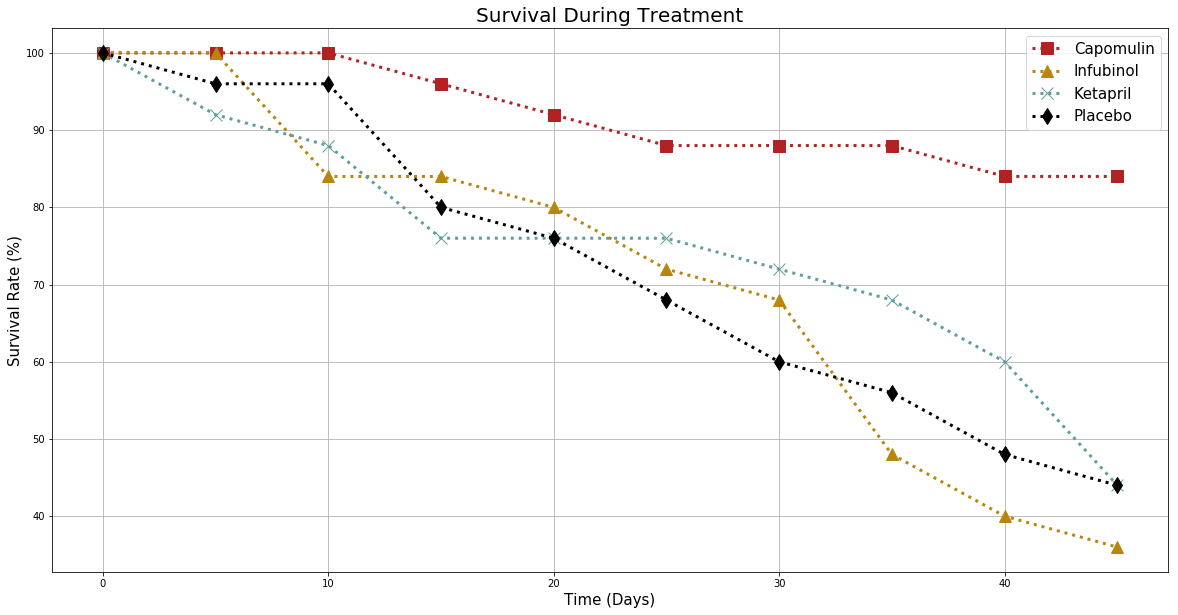

In [45]:
# Generate the Plot (Accounting for percentages)

survival_plot = survival_rate.plot(y=drug_comp, figsize=(20,10),grid=True, linestyle=':', color=colors, ms=12, lw=3)

# set each marker to a unique marker type
for i, style in enumerate(survival_plot.get_lines()):
    style.set_marker(markers[i])
    
plt.legend(loc='best', prop={'size':15})
plt.title('Survival During Treatment', fontsize=20)
plt.xlabel('Time (Days)', fontsize=15)
plt.ylabel('Survival Rate (%)', fontsize=15)
plt.savefig('Images/Survival During Treatment.png')

## Summary Bar Graph

In [46]:
# Calculate the percent changes for each drug

vol_mean_reset = mean_data.reset_index()

start_vol = pd.DataFrame(vol_mean_reset.groupby(['Drug']).first().pop('Tumor Volume (mm3)'))
start_vol = start_vol.rename(columns={'Tumor Volume (mm3)':'Vol Start'})

# Display the data to confirm
start_vol

,Vol Start
Drug,
Capomulin,45.0
Ceftamin,45.0
Infubinol,45.0
Ketapril,45.0
Naftisol,45.0
Placebo,45.0
Propriva,45.0
Ramicane,45.0
Stelasyn,45.0


In [47]:
# Sometimes the mice died before the end of the 45 days. We're only looking at mice that survived the full 45 days
end_vol = pd.DataFrame(vol_mean_reset.groupby(['Drug']).last().pop('Tumor Volume (mm3)'))
end_vol = end_vol.rename(columns={'Tumor Volume (mm3)':'Vol End'})

end_vol

,Vol End
Drug,
Capomulin,36.236114
Ceftamin,64.132421
Infubinol,65.755562
Ketapril,70.662958
Naftisol,69.265506
Placebo,68.084082
Propriva,66.258529
Ramicane,34.955595
Stelasyn,68.438310


In [48]:
# merge start and end dataframes together and calculate the percent change

vol_difference_df = pd.concat([start_vol, end_vol], join='outer', axis=1) # suffixes=(' Start', ' End'))

vol_difference_df

,Vol Start,Vol End
Drug,,
Capomulin,45.0,36.236114
Ceftamin,45.0,64.132421
Infubinol,45.0,65.755562
Ketapril,45.0,70.662958
Naftisol,45.0,69.265506
Placebo,45.0,68.084082
Propriva,45.0,66.258529
Ramicane,45.0,34.955595
Stelasyn,45.0,68.438310


In [49]:
vol_difference_df['Vol Percent Change'] = 100*(vol_difference_df['Vol End']-vol_difference_df['Vol Start'])/vol_difference_df['Vol Start']

vol_percent_change = pd.DataFrame(vol_difference_df.pop('Vol Percent Change'))

# vol_percent_change=vol_percent_change.reset_index()

vol_percent_change

,Vol Percent Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [50]:
# Calculate the standard error for the percent change. Need to calculate the % change in tumor size for each individual mouse, group by drug, then aggregate by sem()

first = merged_clinical_mouse.groupby(['Mouse ID', 'Drug']).first()
first = pd.DataFrame(first.pop('Tumor Volume (mm3)'))
first = first.rename(columns={'Tumor Volume (mm3)':'Start Vol'})

last = merged_clinical_mouse.groupby(['Mouse ID', 'Drug']).last()
# Sometimes the mice dies before the end of thee 45 days. We're not including those mice in this analysis, so, I'm only interested in thee mice that survived 45 days
last = last[last['Timepoint'] == 45]
last = pd.DataFrame(last.pop('Tumor Volume (mm3)'))
last = last.rename(columns={'Tumor Volume (mm3)':'End Vol'})

indv_tumor_change = pd.concat([first, last], axis=1)

# Drop any rows where the mice didn't survive the full time
indv_tumor_change= indv_tumor_change.dropna()

# display data
indv_tumor_change.head()

,,Start Vol,End Vol
Mouse ID,Drug,,
a203,Infubinol,45.0,67.973419
a251,Infubinol,45.0,65.525743
a262,Placebo,45.0,70.717621
a275,Ceftamin,45.0,62.999356
a401,Zoniferol,45.0,66.794156


In [51]:
# Calculate percent change foor each mouse
indv_tumor_change['Percent Change']=100*(indv_tumor_change["Start Vol"]-indv_tumor_change['End Vol'])/indv_tumor_change['Start Vol']

indv_tumor_change=indv_tumor_change.reset_index()

In [52]:
# Group by drug and aggregate using sem()
tum_change_se = indv_tumor_change.groupby(['Drug']).sem()

# Data munging
tum_change_se = pd.DataFrame(tum_change_se.pop('Percent Change'))
tum_change_se = tum_change_se.rename(columns={"Percent Change":'Standard Error of Percent Change'})

tum_change_se

,Standard Error of Percent Change
Drug,
Capomulin,2.719950
Ceftamin,2.005239
Infubinol,2.543172
Ketapril,3.229303
Naftisol,3.147474
Placebo,3.003835
Propriva,4.196857
Ramicane,2.726233
Stelasyn,3.503458


In [53]:
# Concatctenate dfs together so the means and standard errors are all in one place.
vol_percent_change = pd.concat([vol_percent_change, tum_change_se], axis=1)

vol_percent_change

,Vol Percent Change,Standard Error of Percent Change
Drug,,
Capomulin,-19.475303,2.719950
Ceftamin,42.516492,2.005239
Infubinol,46.123472,2.543172
Ketapril,57.028795,3.229303
Naftisol,53.923347,3.147474
Placebo,51.297960,3.003835
Propriva,47.241175,4.196857
Ramicane,-22.320900,2.726233
Stelasyn,52.085134,3.503458


In [54]:
# function to autolabel bars
def autolabelpercent(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        width = rect.get_width()
        rect_start = rect.get_x()
        # Make it so the label is always to the outside of the bar even if there's a negative value
        if height > 0:
            v_align = 'bottom'
        else:
            v_align = 'top'
        ax.text(rect_start + width/2., height/15, 
                str(int(height))+'%', ha='center', va=v_align, color='white', size=14)

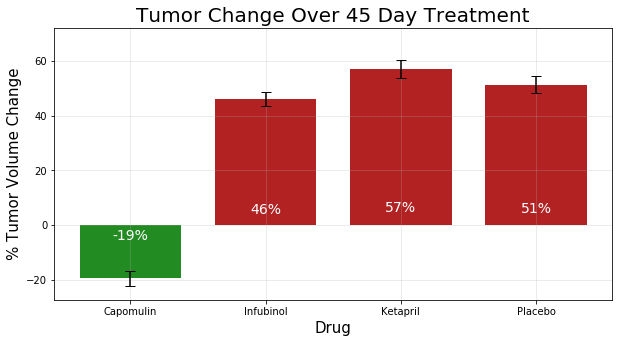

In [55]:
fig, ax = plt.subplots(figsize=(10,5))

# Make bar colors red or green depending on value
for drug in drug_comp:
    if vol_percent_change.loc[drug,'Vol Percent Change'] > 0:
        bar_color = 'firebrick'
    else:
        bar_color = 'forestgreen'
    tumor_bar = ax.bar(drug, vol_percent_change.loc[drug,'Vol Percent Change'], 
                       yerr=vol_percent_change.loc[drug, 'Standard Error of Percent Change'],
                       capsize=5, color=bar_color, width=0.75, align = 'center')
    autolabelpercent(tumor_bar)

ymax = max(vol_percent_change['Vol Percent Change'])
ymin = min(vol_percent_change['Vol Percent Change'])

plt.grid(alpha=0.3)
plt.title('Tumor Change Over 45 Day Treatment', fontsize=20)
plt.xlabel('Drug', fontsize=15)
plt.ylim(ymin-5, ymax+15)
plt.ylabel('% Tumor Volume Change', fontsize=15)
plt.savefig('Images/Tumor Change Over 45 Day Treatment')